In [ ]:
!pip install apyori

In [ ]:
from apyori import apriori
import pandas as pd

# Load CSV file
df = pd.read_csv("/content/Market_Basket_Optimisation.csv")
df.head()

#this dataset contains 7500 rows

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


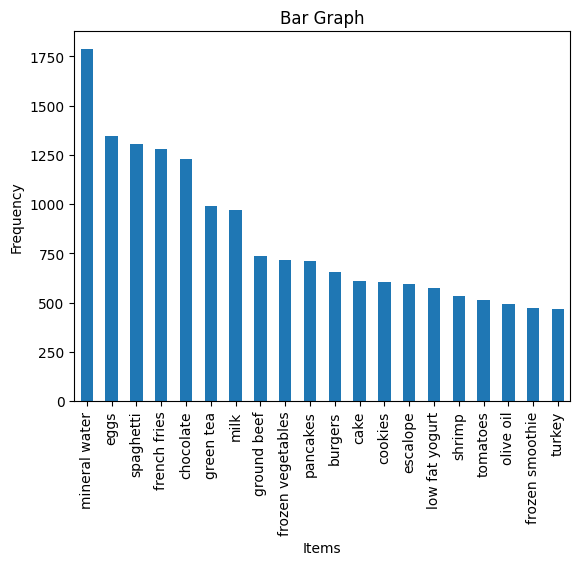

In [61]:
#data visualisation
from matplotlib import pyplot as plt

# Flatten the DataFrame into a single list of items
items = [item for row in df.values for item in row]

# Drop NaN values and count the frequency of each item
item_counts = pd.Series(items).dropna().value_counts()

# Plot histogram
item_counts[:20].plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Bar Graph')
plt.show()


In [ ]:
df.loc[:, 'shrimp':'olive oil']

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#data cleaning
#nan to string
df.loc[:, 'shrimp':'olive oil'] = df.loc[:, 'shrimp':'olive oil'].applymap(str)
df.fillna('nan', inplace=True)


In [ ]:
#list of rows

rowList = []
for index,row in df.iterrows():
    rowList.append(row.tolist())


In [ ]:
#applying apriori
association_rules = apriori(rowList, min_support=0.05, min_confidence=0.1, min_lift=1)
association_results = list(association_rules)

In [ ]:
for item in association_results:
    items = set(item.items)
    #nan cannot be a frequent itemset
    if 'nan' not in items and len(items) > 1:
        print("Itemset:",items)
        print("Support: ",item.support)
        for rule in item.ordered_statistics:
            if rule.items_base and rule.items_add:
                print("Base:",rule.items_base," Add:",rule.items_add)
                print("Confidence: ",rule.confidence)
                print("Lift:", rule.lift)
        print()

Itemset: {'mineral water', 'chocolate'}
Support:  0.05266666666666667
Base: frozenset({'chocolate'})  Add: frozenset({'mineral water'})
Confidence:  0.32139951179820997
Lift: 1.3489067367020564
Base: frozenset({'mineral water'})  Add: frozenset({'chocolate'})
Confidence:  0.22104085058757697
Lift: 1.3489067367020564

Itemset: {'eggs', 'mineral water'}
Support:  0.05093333333333333
Base: frozenset({'eggs'})  Add: frozenset({'mineral water'})
Confidence:  0.28338278931750743
Lift: 1.1893513821383916
Base: frozenset({'mineral water'})  Add: frozenset({'eggs'})
Confidence:  0.21376608841634023
Lift: 1.1893513821383916

Itemset: {'mineral water', 'spaghetti'}
Support:  0.05973333333333333
Base: frozenset({'mineral water'})  Add: frozenset({'spaghetti'})
Confidence:  0.2506994963626189
Lift: 1.4396984860027884
Base: frozenset({'spaghetti'})  Add: frozenset({'mineral water'})
Confidence:  0.3430321592649311
Lift: 1.4396984860027886

